<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера</b>
    
Привет! Меня зовут Светлана Носова, я буду проверять твой проект. Если не против, давай общаться на «ты». Если тебе такой стиль общения не нравится, напиши об этом, будем на «вы». 

Сразу хочу обратить внимание на цветовую разметку.
Зеленым отмечены отличные решения и идеи, которые можно и нужно использовать в будущем. Желтым отмечено то, что можно или нужно оптимизировать, в зависимости от контекста. Красным обозначены пропущенные пункты задания и  ошибки, которые обязательно надо будет исправить, чтобы результаты были верные.
    
**Ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме перечисленных.**
Также я попрошу тебя **не менять, не передвигать и не удалять мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
    
Кроме того, комментарии у меня обозначены как заголовки. Это сбивает содержание, но при последующей проверке я могу снять с них заголовок, если тебе так будет удобнее. При этом они удобны, поскольку ты сразу можешь перейти к ним.   
        
<hr>
    
**По проекту:** в целом, работа выполнена хорошо, все оформлено понятно и аккуратно, есть анализ и промежуточные выводы. У меня остались некоторые вопросы, я все написала в комментариях. Там же я оставила и рекомендации по улучшению проекта. Буду ждать работу на повторное ревью.
    
<hr style="border-top: 3px solid purple; "></hr>
Комментарии можешь оставлять с помощью такого кода в Markdown ячейке:
    
    
    <div class="alert alert-info">
    <h2> Комментарий студента</h2>

    Тут текст.
    </div>
    
    
    <font color='red'> Этот код позволяет менять цвет текста. </font>     

<font color='red'> Выглядит это так. </font> 
  
    
Если не хочешь, чтобы твои комментарии отображались в содержании как заголовки, замени **h2** на **b** или добавь `<a class="tocSkip">` после фразы *Комментарий студента*.
</div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера</h2>
    
Правильно делаешь, что добавляешь краткое описание задачи. Это поможет быстро вспомнить, о чем проект, если ты к нему вернешься спустя какое-то время.
</div>

In [86]:
from matplotlib import pyplot as plt

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [21]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Inga/Data/data_project_1.csv')
print(data.head(20))
data.info()

    Unnamed: 0  children  ...   total_income                                 purpose
0            0         1  ...  253875.639453                           покупка жилья
1            1         1  ...  112080.014102                 приобретение автомобиля
2            2         0  ...  145885.952297                           покупка жилья
3            3         3  ...  267628.550329              дополнительное образование
4            4         0  ...  158616.077870                         сыграть свадьбу
5            5         0  ...  255763.565419                           покупка жилья
6            6         0  ...  240525.971920                       операции с жильем
7            7         0  ...  135823.934197                             образование
8            8         2  ...   95856.832424                   на проведение свадьбы
9            9         0  ...  144425.938277                 покупка жилья для семьи
10          10         2  ...  113943.491460                    п

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Вывод**

Импортировали библиотеку pandas. Методом .read_csv() загрузили файл и сохранили в переменную data.
При просмотре исходной таблицы видны отрицательные значения в продолжительности рабочего стажа (в days_employed), в столбце education есть значения, которые начинаются с заглавных букв (Среднее), total_income приведен до шестого знака после запятой. Заметны большие значения в days_employed и total_income. При просмотре информации, полученной методом .info(), замечены пропущенные значения в столбцах days_employed, total_income.   

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера</h2>
    
Хорошая вводная часть.
</div>

## Шаг 2. Предобработка данных

### Обработка пропусков

In [23]:
print(data.isnull().sum())
missing_data = data[data.isnull().any(axis=1)]
print(missing_data)

print(data['income_type'].unique())
print(missing_data['income_type'].unique())

data['days_employed'] = data['days_employed'].abs()



Unnamed: 0             0
children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64
       Unnamed: 0  children  ...  total_income                           purpose
12             12         0  ...           NaN                   сыграть свадьбу
26             26         0  ...           NaN                       образование
29             29         0  ...           NaN  строительство жилой недвижимости
41             41         0  ...           NaN  сделка с подержанным автомобилем
55             55         0  ...           NaN                   сыграть свадьбу
...           ...       ...  ...           ...                               ...
21489       21489         2  ...           NaN              сделка с автомобилем
21495       21

In [24]:
#data.loc[:,('total_income')] = data.groupby('income_type')['total_income'].apply(lambda x: x.fillna(x.median()))
data.loc[:,('days_employed')] = data.groupby('income_type')['days_employed'].apply(lambda x: x.fillna(x.median()))

print(data.isnull().sum())

Unnamed: 0             0
children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера</h2>
    
Отлично. Раз уж у нас есть такая возможность, давай попробуем заменить пропуски медианой, но взятой по 2-3 характеристикам клиента? Группы можно собрать по разным параметрам. Например, тип занятости + образование + возрастная группа. Попробуешь реализовать это? Если что, я помогу. Столбец стажа можно так не заполнять, поскольку он нам не нужен. 
</div>

In [9]:
data.head()

,Unnamed: 0,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [25]:
years = data.dob_years.apply(lambda x: int(x/10))

In [26]:
data[['years']] = years

In [27]:
data.loc[:,('total_income')] = data[['total_income', 'income_type', 'education_id', 'years']].groupby(['income_type', 'education_id', 'years'])['total_income'].apply(lambda x: x.fillna(x.median()))

In [28]:
data.isna().sum()

Unnamed: 0          0
children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        3
purpose             0
years               0
dtype: int64

In [30]:
data = data.dropna()

## Попробуем избавиться от выбросов

In [79]:
data.describe()

,Unnamed: 0,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,years,children_yes_or_no,family_status_index
count,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000,21522.000000,2.152200e+04,21522.000000,21522.000000,21522.000000
mean,10762.785475,0.543305,67308.168014,43.290493,0.817071,0.972586,0.080894,1.653762e+05,3.880123,0.342673,0.769166
std,6213.862386,1.379959,139409.359935,12.572950,0.547744,1.420407,0.272679,9.817482e+04,1.282008,0.474614,0.421376
min,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,2.066700e+04,0.000000,0.000000,0.000000
25%,5381.250000,0.000000,1025.000000,33.000000,1.000000,0.000000,0.000000,1.076522e+05,3.000000,0.000000,1.000000
50%,10763.500000,0.000000,1993.500000,42.000000,1.000000,0.000000,0.000000,1.431290e+05,4.000000,0.000000,1.000000
75%,16143.750000,1.000000,5348.500000,53.000000,1.000000,1.000000,0.000000,1.976342e+05,5.000000,1.000000,1.000000
max,21524.000000,20.000000,401755.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06,7.000000,1.000000,1.000000


Кандидаты на удаление: 
* max children
* max days_employed
* max total_income

In [80]:
data.sort_values(['children'])

,Unnamed: 0,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years,children_yes_or_no,family_status_index
10763,10763,0,352170,55,начальное,3,женат / замужем,0,F,пенсионер,0,84727,ремонт жилью,5,0,1
17565,17565,0,476,25,высшее,0,не женат / не замужем,4,F,сотрудник,0,185558,покупка жилой недвижимости,2,0,0
10101,10101,0,1404,60,среднее,1,женат / замужем,0,F,компаньон,0,206714,на покупку своего автомобиля,6,0,1
10102,10102,0,647,53,среднее,1,вдовец / вдова,2,M,сотрудник,0,171922,покупка своего жилья,5,0,0
10103,10103,0,1347,52,высшее,0,женат / замужем,0,F,сотрудник,0,133402,сделка с автомобилем,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5315,20,2047,24,среднее,1,женат / замужем,0,F,сотрудник,0,100415,покупка коммерческой недвижимости,2,1,1
7078,7078,20,1202,40,среднее,1,женат / замужем,0,F,сотрудник,0,67529,получение высшего образования,4,1,1
9889,9889,20,2232,34,среднее,1,не женат / не замужем,4,M,сотрудник,0,53971,покупка жилья,3,1,0
3735,3735,20,805,26,высшее,0,не женат / не замужем,4,M,сотрудник,0,137200,ремонт жилью,2,1,0


Оказывается, 20 детей - не единичная ошибка, а целая группа. Сделаем предположение, что 20 = 2, и поменяем данные:

In [82]:
def no_more_children(x):
    if x == 20:
      return 2
    else:
      return x

In [83]:
data.children.apply(no_more_children)

0        1
1        1
2        0
3        3
4        0
        ..
21520    1
21521    0
21522    1
21523    3
21524    2
Name: children, Length: 21522, dtype: int64

In [84]:
data

,Unnamed: 0,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years,children_yes_or_no,family_status_index
0,0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,4,1,1
1,1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,3,1,1
2,2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,3,0,1
3,3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,3,1,1
4,4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,21520,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,4,1,1
21521,21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,6,0,1
21522,21522,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,3,1,1
21523,21523,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,3,1,1


In [85]:
data.sort_values(["days_employed"])

,Unnamed: 0,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years,children_yes_or_no,family_status_index
17437,17437,1,24,31,среднее,1,женат / замужем,0,F,сотрудник,1,166952,высшее образование,3,1,1
8336,8336,0,24,32,высшее,0,не женат / не замужем,4,M,сотрудник,0,124115,получение дополнительного образования,3,0,0
6157,6157,2,30,47,среднее,1,гражданский брак,1,M,компаньон,0,231461,свадьба,4,1,1
9683,9683,0,33,43,среднее,1,не женат / не замужем,4,M,сотрудник,1,128555,приобретение автомобиля,4,0,0
2127,2127,1,34,31,высшее,0,женат / замужем,0,F,компаньон,0,90557,получение образования,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,7794,0,401663,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286,свадьба,6,0,1
2156,2156,0,401674,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395,автомобили,6,0,1
7664,7664,1,401675,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214,операции с жильем,6,1,1
10006,10006,0,401715,69,высшее,0,не женат / не замужем,4,F,пенсионер,0,57390,получение образования,6,0,0


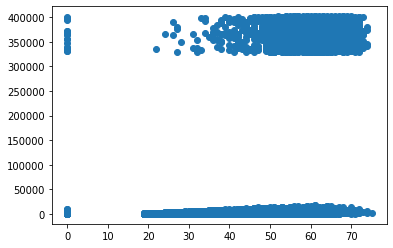

In [88]:
plt.scatter(data.dob_years,data.days_employed)

**Вывод**

Используя функции .isnull().sum() видим, что в столбцах days_employed и total_income пропущено одинаковое количество значений - 2174. После отфильтровки строк с пропущенными значениями при помощи логической индексации, видим, что общее количество строк с пропущенными значениями 2174. Это означает что в каждой из таких сторок пропущены сразу два значения: days_employed и total_income. Это выглядим логичным, так как люди без работы не имеют дохода. Проверяем эту гипотезу. 

Вызовом функции unique() сморим, как обозначены люди без дохода и видим, что есть отдельная категория 'безработный'. При проверке уникальных значений для таблицы с пропущенными значениями missing_data, видим, что безработные туда не входят. Значит, значения пропущены случайным образом. 

Все пропуски помечены NaN. Их необходимо заполнить медианными данными для соответствующих категорий занятости ('пенсионер' 'госслужащий' 'компаньон' 'сотрудник' 'предприниматель'). Перед рассчетом медианы, избавимся от отрицательныз значений в столбце 'days_employed', сохранив их как положительные.  

Заполним пропуски на медианные значения для соответствующих категорий используя метод apply(). Затем проверим заполнение вызовом функции isnull().sum(). Пропущенных значений больше нет.  

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера</h2>
    
Да, очень похоже на то, что пропуски случайны. Скорее всего имеем склейку разных таблиц.</div>

### Замена типа данных

In [31]:
data['days_employed'] = data['days_employed'].astype(int)
data['total_income'] = data['total_income'].astype(int)
       

Вывод

Для удобства работы с данными, заменим тип данных столбцов days_employed и total_income с float на integer испольщуя метод .astype(int). Десятичные цифры в данном случае не важны, их можно опустить для ускорения времени обработки.


### Обработка дубликатов

In [32]:
from collections import Counter
print(Counter(data['education']))
data['education'] = data['education'].str.lower()
print(Counter(data['education']))

print(Counter(data['family_status']))
data['family_status'] = data['family_status'].str.lower()
print(Counter(data['family_status']))
print(Counter(data['income_type']))
print(Counter(data['purpose']))
print(Counter(data['gender']))

print(data.duplicated().sum()) 
print(data.shape)

data.drop_duplicates(keep = 'first', inplace = True)

print(data.duplicated().sum()) 
print(data.shape)

Counter({'среднее': 13750, 'высшее': 4717, 'СРЕДНЕЕ': 772, 'Среднее': 711, 'неоконченное высшее': 668, 'ВЫСШЕЕ': 274, 'Высшее': 268, 'начальное': 248, 'Неоконченное высшее': 47, 'НЕОКОНЧЕННОЕ ВЫСШЕЕ': 29, 'НАЧАЛЬНОЕ': 17, 'Начальное': 15, 'ученая степень': 4, 'Ученая степень': 1, 'УЧЕНАЯ СТЕПЕНЬ': 1})
Counter({'среднее': 15233, 'высшее': 5259, 'неоконченное высшее': 744, 'начальное': 280, 'ученая степень': 6})
Counter({'женат / замужем': 12379, 'гражданский брак': 4175, 'Не женат / не замужем': 2813, 'в разводе': 1195, 'вдовец / вдова': 960})
Counter({'женат / замужем': 12379, 'гражданский брак': 4175, 'не женат / не замужем': 2813, 'в разводе': 1195, 'вдовец / вдова': 960})
Counter({'сотрудник': 11118, 'компаньон': 5085, 'пенсионер': 3856, 'госслужащий': 1458, 'безработный': 2, 'студент': 1, 'предприниматель': 1, 'в декрете': 1})
Counter({'свадьба': 797, 'на проведение свадьбы': 777, 'сыграть свадьбу': 773, 'операции с недвижимостью': 676, 'покупка коммерческой недвижимости': 664, 'оп

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера</h2>
    
Поскольку у нас нет уникальных идентификаторов пользователей, эти дубликаты вполне могут быть разными людьми. А вот дубликаты записей в столбцах вроде **Среднее** образование и **среднее** образование удалить надо было (путем приведения к одному регистру), это верно. </div>

**Вывод**

1) Методом Counter проверим количества уникальных значений для столбцов типа object. Видим, что в столбцах 'education' и 'family_status' много дубликатов из-за использования заглавных букв. Приведем содержимое этих двух столбцов к единому формату используя функцию str.lower(). Проверим результат методом Counter.
2) Вызовом функции duplicated() находим общее количество дупликатов в таблице. Методом drop_duplicates удаляем полные дубликаты в таблице, оставляя первую строку при помощи keep = 'first' и избавляясь только от дублирующей строки. Проверяем результат методом shape до и после удаления. Видим, что удалены только 71 дублирующих строки. Полные дубликаты могли появиться при объединении нескольких меньших датасетов в один большой.


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<h2> Комментарий ревьюера </h2>
    
В задаче нас просят обратить внимание на словари. Словарем можно назвать пару столбцов `education` и `education_id`, поскольку они взаимозаменяемы и из них можно слепить словарь (структуру данных dict). Есть еще что-нибудь подобное в таблице?
</div>

### Лемматизация

In [33]:
from pymystem3 import Mystem
m = Mystem()
lemmas = [[m.lemmatize(word) for word in data['purpose']]]  
print(lemmas)


Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


KeyboardInterrupt: ignored

**Вывод**

Лемматизируем строки в столбце 'purpose'. Для этого выделим основу каждого слова word в столбце и сохраним как переменную lemmas.



### Категоризация данных

In [ ]:
#print(data['purpose'].value_counts())

def category_purpose(purpose):
    for i in lemmas:
        if 'жилье' in i:
            return 'операции с недвижимостью'
        if 'недвижимость' in i:
            return 'операции с недвижимостью'
        if 'автомобиль' in i:
            return 'операции с автомобилем'
        if 'свадьба' in i:
            return 'свадьба'  
        if 'образование' in i:
            return 'образование'     
    
data.loc[data.loc[:,'purpose'].apply(category_purpose)] 

print(Counter(data['purpose']))


ValueError: cannot index with vector containing NA / NaN values

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера</h2>
    
Согласна с категориями. Но если у тебя будет миллион строк и 100 категорий? Проще ведь сначала лемматизировать, а потом тот же Counter применить.  </div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера</h2>
    
Не забудь исправить ошибку. </div>

**Вывод**

Методом value_counts проверяем какие значения встречаются в столбце 'purpose'. Видно, что они и те же цели написаны по-разному (например, 'свадьба': 797, 'на проведение свадьбы': 777, 'сыграть свадьбу' и тд.). В функции создадим сортировку по категорям для целей кредита и перезапишем столбец purpose используя категории. Методом Counter проверим новые значения столбца purpose.  

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [34]:
print(data['children'].value_counts())
data['children'] = data['children'].abs()
print(data['children'].value_counts())
# категоризация по наличию детей: boolean type - 0-детей нет, 1 - дети есть
def children_yes_or_no(children):
    if children == 0:
        return 0
    else:
        return 1
    
data['children_yes_or_no'] = data['children'].apply(children_yes_or_no)
#print(data['children_yes_or_no'].head(20))
#print(data.head(20))
data['debt'].corr(data['children_yes_or_no'])

 0     14147
 1      4817
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64
0     14147
1      4864
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64


0.029228570049726794

In [44]:

def family_status_index(status):
    if status == 'не женат / не замужем': 
        return 0
    if status == 'в разводе': 
        return 0 
    
    if status == 'вдовец / вдова':
        return 0 
    else:
        return 1
    
data['family_status_index'] = data['family_status'].apply(family_status_index)

**Вывод**

Коэффициент корреляции между наличием детей и задолженностей по кредиту равен 0.03. Явной зависимости между этими двумя параметрами нет.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера</h2>
    
Это коэфф-т линейной связи. А если связь нелинейная? Выведи проценты невозврата. Для этого надо число долгов разделить на общее число кредитов внутри каждой группы. Ниже аналогично. </div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера</h2>
    
20 детей это не ошибка? </div>

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

**Вывод**

Коэффициент корреляции между семейным положением и задолженностей по кредиту равен -0.008. Явной зависимости между этими двумя параметрами нет.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
data['debt'].corr(data['total_income'])

**Вывод**

На удивление, анализ не выявил корреляции между уровнем дохода и возвратом кредита в срок. Возможно, стоит убрать выдающиеся значения из анализа.

- Как разные цели кредита влияют на его возврат в срок?

In [ ]:
data['purpose']=data['purpose'].astype('category').cat.codes
data['debt'].corr(data['purpose'])


**Вывод**

Для анализа корреляции нужно привести значения в столбце purpose к категориальному типу. При использовании метода corr, коэффициент корреляции 0.001. Значительной корреляции между величинами нет.

## Шаг 4. Общий вывод

Анализ показал, что ни один из перечисленных факторов не оказывает значительного влияния на возврат кредита в срок. 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<h2> Комментарий ревьюера</h2>
    
После корректировок не забудь привести проценты невозврата в срок у самых надежных и самых безответственных клиентов для каждой группы. Например: самые надежные клиенты это люди, берущие кредит на операции с недвижимостью (такой-то процент невозврата в срок), а самые безответственные те, кто обращается в банк с целью получить деньги на покупку автомобиля (такой-то процент). И так для каждый группы. Это хороший тон, — подкреплять вывод полученными ранее результатами. Кроме того, так ты не оставляешь заказчику шансов неверно интерпретировать вывод.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [ ]  объяснено, по какому принципу заполнены пропуски;
- [ ]  заменен вещественный тип данных на целочисленный;
- [ ]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [ ]  удалены дубликаты;
- [ ]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [ ]  описаны возможные причины появления дубликатов в данных;
- [ ]  выделены леммы в значениях столбца с целями получения кредита;
- [ ]  описан процесс лемматизации;
- [ ]  данные категоризированы;
- [ ]  есть объяснение принципа категоризации данных;
- [ ]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [ ]  в каждом этапе есть выводы;
- [ ]  есть общий вывод.